In [9]:
'''
CS7642 Reinforcement Learning
Summer 2019
Name: Zuolin Liu
GT Account: zliu653
Project 1 Desperately Seeking Sutton
'''

'\nCS7642 Reinforcement Learning\nSummer 2019\nName: Zuolin Liu\nGT Account: zliu653\nProject 1 Desperately Seeking Sutton\n'

In [1]:
''' 
block #1: Setup and helper functions
This block contains initial setups and helper functions, press shift + enter to run this block first
For a computer with 2 GHz Intel Core i5 processor and 8 GB 1867 MHz LPDDR3 Memory, this block take instant to run.
'''

# import libraries
import numpy as np
from matplotlib import pyplot as plt
import math
import random

# set parameters
true_prob = np.array([1/6, 1/3, 1/2, 2/3, 5/6])
problem_size = len(true_prob) + 2
start_state = int((problem_size - 1)/2)
terminal_states = [0, problem_size - 1]
num_train_sets = 100
num_sequence_per_train = 10

def initalize(problem_size, random=True):
    '''
        function to initialize X, P, W
    '''
    X = np.eye(problem_size)
    if random:
        W = np.random.rand(1, problem_size)
    else:
        W = np.ones((1, problem_size)) * 0.5
    P = np.dot(W, X)
    P[0, 0] = 0.
    P[0, -1] = 1.
    return X, W, P

# a series of functions to generate data

def generate_sequence(start_state = start_state, terminal_states = terminal_states):
    ''' 
    generate a random sequence
    '''
    state = start_state
    sequence = [state]
    while state not in terminal_states:
        state += random.choice([-1, 1])
        sequence.append(state)
    return sequence

def generate_sequence_0(start_state = start_state, terminal_states = terminal_states):
    ''' 
    generate a sequence ending with left-most state
    '''
    sequence = generate_sequence()
    while sequence[-1] != terminal_states[0]:
        sequence = generate_sequence()
    return sequence

def generate_sequence_1(start_state = start_state, terminal_states = terminal_states):  
    ''' 
    generate a sequence ending with right-most state
    '''
    sequence = generate_sequence()
    while sequence[-1] != terminal_states[-1]:
        sequence = generate_sequence()
    return sequence

def generate_data(num_train_sets=num_train_sets, 
                  num_sequence_per_train=num_sequence_per_train, seed=True):
    ''' 
        randomly generate data set for tranining
    '''
    if seed:
        random.seed(6012019)
    data = []
    for _ in range(num_train_sets):
        row = []
        for _ in range(num_sequence_per_train):
            row += [generate_sequence()]
        data += [row]
    return data

def generate_data_balanced(num_train_sets=num_train_sets, 
                           num_sequence_per_train=num_sequence_per_train):
    ''' 
    generate balanced data: half of the training set end at left 
    and the other half end at right
    '''
    random.seed(6012019)
    data = []    
    for _ in range(num_train_sets):
        row = []
        for _ in range(int(num_sequence_per_train/2)):
            row += [generate_sequence_0()]
            row += [generate_sequence_1()]
        random.shuffle(row)
        data += [row]
    return data

def generate_data_bound_length(num_train_sets=num_train_sets, 
                               num_sequence_per_train=num_sequence_per_train, 
                               max_length=20):
    ''' 
    limit the maximum length of each sequence to less than 25
    '''
    random.seed(6012019)
    data = []    
    for _ in range(num_train_sets):
        row = []
        count = 0
        while count < num_sequence_per_train:
            sequence = generate_sequence()
            if len(sequence) <= max_length:
                row += [sequence]
                count += 1
        data += [row]
    return data

def generate_data_bound_length_balanced(num_train_sets=num_train_sets, 
                                        num_sequence_per_train=num_sequence_per_train, 
                                        max_length=20):
    ''' 
    balance data and bound sequnce length at 25
    '''
    random.seed(6012019)
    data = []    
    for _ in range(num_train_sets):
        row = []
        count = 0
        while count < num_sequence_per_train/2:
            sequence = generate_sequence_0()
            if len(sequence) <= max_length:
                row += [sequence]
                count += 1
        count = 0
        while count < num_sequence_per_train/2:
            sequence = generate_sequence_1()
            if len(sequence) <= max_length:
                row += [sequence]
                count += 1
        random.shuffle(row)
        data += [row]
    return data

def get_delta_w(sequence, lmda, X, P, alpha):
    '''
    calculate delta w giving a sequence, lamda, P and alpha
    '''
    e = X[sequence[0]]
    delta_w = (alpha * (P[0,sequence[1]] - P[0,sequence[0]]) * e).reshape((1, problem_size))
    for i in range(1, len(sequence)-1):
        e = e * lmda + X[sequence[i]] 
        delta_w += (alpha * (P[0,sequence[i+1]] - P[0,sequence[i]]) * e).reshape((1, problem_size))
    return delta_w

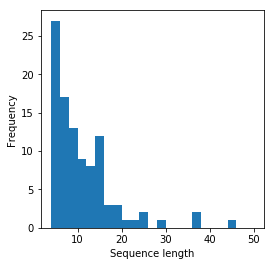

CPU times: user 222 ms, sys: 9.96 ms, total: 232 ms
Wall time: 242 ms


In [2]:
'''
Block #2: plot a histogram for sequence length.
press shift + enter to run
For a computer with 2 GHz Intel Core i5 processor and 8 GB 1867 MHz LPDDR3 Memory, this block take 292 ms to run.
'''
def plot_hist():
    data = []
    for _ in range(100):
        data += [len(generate_sequence())]

    plt.figure(figsize=(4,4))    
    plt.hist(data, bins=[i for i in range(4, 51, 2)])
    plt.xlabel('Sequence length')
    plt.ylabel('Frequency')
    plt.show()
%time plot_hist()

********** random **********
Average RMSE: [ 0.121  0.121  0.124  0.127  0.134  0.154  0.185]
Standard error: [ 0.007  0.007  0.007  0.007  0.007  0.008  0.009]


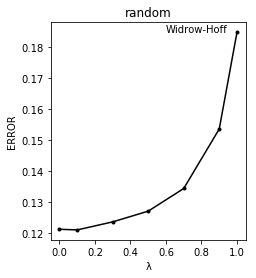

********** balanced **********
Average RMSE: [ 0.049  0.049  0.052  0.057  0.068  0.093  0.128]
Standard error: [ 0.002  0.002  0.002  0.003  0.003  0.004  0.006]


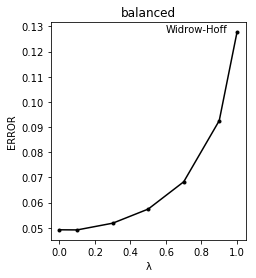

********** bound20 **********
Average RMSE: [ 0.118  0.119  0.121  0.125  0.133  0.151  0.173]
Standard error: [ 0.007  0.007  0.007  0.007  0.007  0.007  0.007]


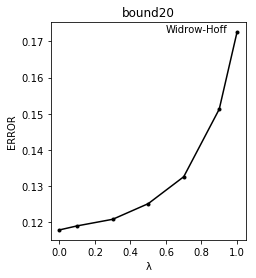

********** balanced_bound20 **********
Average RMSE: [ 0.06   0.06   0.062  0.068  0.078  0.103  0.131]
Standard error: [ 0.003  0.003  0.003  0.003  0.004  0.004  0.005]


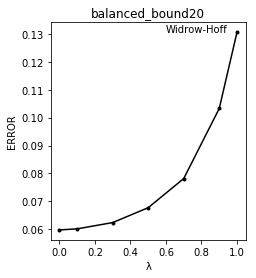

CPU times: user 1min 17s, sys: 508 ms, total: 1min 18s
Wall time: 1min 18s


In [3]:
'''
Block #3: plots related to experiment 1 and Fig 3 in Sutton 1988    
This block contains code to generate plots for experiment 1, press shift + enter to run
For a computer with 2 GHz Intel Core i5 processor and 8 GB 1867 MHz LPDDR3 Memory, this block take 1min 37s to run.
''' 

def train_1(alpha, lmda, data):
    '''
    train model with given alpha, lambda and data
    '''
    rmse = []
    for i in range(num_train_sets):
        X, W, P = initalize(problem_size) 
        converge = False
        while not converge:   
            delta_w = np.zeros((1, problem_size))
            for sequence in data[i]:
                delta_w += get_delta_w(sequence, lmda, X, P, alpha)
            if np.mean(np.abs(delta_w)) < 0.0001:
                converge = True
            W += delta_w
            P = np.dot(W, X)
            P[0,0] = 0.0
            P[0,-1] = 1.0
        rmse += [math.sqrt(np.mean((P[0, 1:-1] - true_prob)**2))]
    return rmse

def generate_plots_1(title, data):
    '''
    generate a plot
    '''
    rmse_avg = []
    rmse_sde = []
    alpha = 0.01
    lambdas = [0., 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    for lmda in lambdas:
        rmse = train_1(alpha, lmda, data)
        rmse_avg.append(np.mean(rmse))
        rmse_sde.append(np.std(rmse)/math.sqrt(num_train_sets))
    print('Average RMSE:', np.round(rmse_avg, decimals=3))
    print('Standard error:', np.round(rmse_sde, decimals=3))
    plt.figure(figsize=(3.5,4))
    plt.plot(lambdas, rmse_avg, 'k.-')
    plt.xlabel("\u03BB")
    plt.ylabel("ERROR")
    plt.text(0.6, max(rmse_avg), 'Widrow-Hoff')
    plt.title(title)
    plt.show()
    
def run_experiment_1():
    '''
    generate plots with different data
    '''
    titles = ['random', 'balanced', 'bound20', 'balanced_bound20']
    generate_data_functions = [generate_data, 
                               generate_data_balanced, 
                               generate_data_bound_length, 
                               generate_data_bound_length_balanced]
    for i in range(len(titles)):
        print('********** ' + titles[i] + ' **********')
        data = generate_data_functions[i]()
        generate_plots_1(titles[i], data)

%time run_experiment_1()

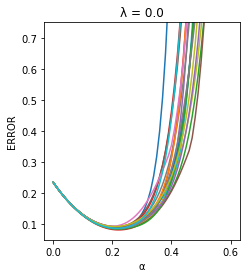

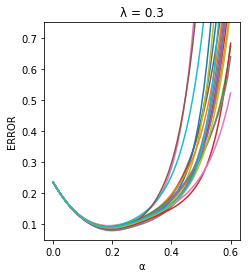

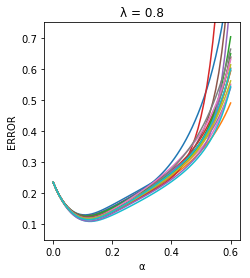

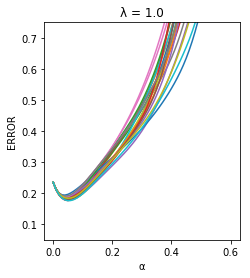

********** random **********
Average error after each training set


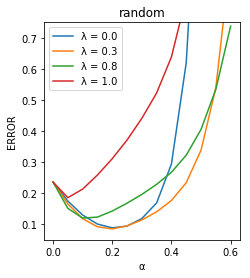

Average error after each sequence


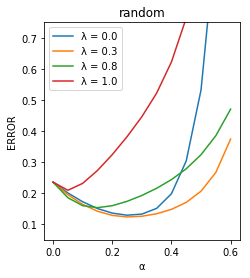

********** balanced **********
Average error after each training set


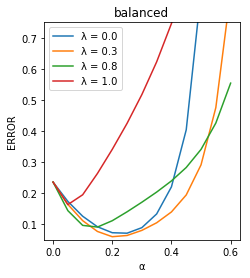

Average error after each sequence


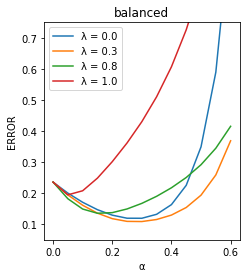

********** bound20 **********
Average error after each training set


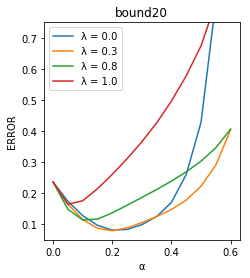

Average error after each sequence


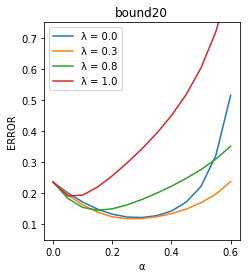

********** balanced_bound20 **********
Average error after each training set


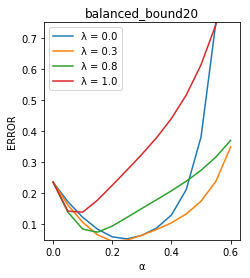

Average error after each sequence


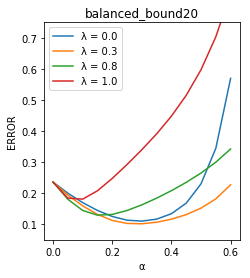

CPU times: user 3min 16s, sys: 1.89 s, total: 3min 18s
Wall time: 3min 17s


In [4]:
'''
Block #4: plots related to experiment 2 and Fig 4 in Sutton 1988
This block contains code to generate plots related to Fig 4 in Sutton 1988, press shift + enter to run
For a computer with 2 GHz Intel Core i5 processor and 8 GB 1867 MHz LPDDR3 Memory, this block take ~ 4mim to run.
''' 
def train_2(alpha, lmda, data, error_per_sequence=False):
    rmse = []
    for i in range(num_train_sets):
        X, W, P = initalize(problem_size, random=False) 
        error = 0.0
        for sequence in data[i]:
            delta_w = get_delta_w(sequence, lmda, X, P, alpha)
            W += delta_w
            P = np.dot(W, X)         
            P[0,0] = 0.0
            P[0,-1] = 1.0
            if error_per_sequence:
                error += math.sqrt(((P[0, 1:-1] - true_prob)**2).mean())
        if error_per_sequence:
            rmse += [error/num_sequence_per_train]
        else:
            rmse += [math.sqrt(((P[0, 1:-1] - true_prob)**2).mean())]
    return rmse

def generate_plots_2(data, title, error_per_sequence):
    alphas = [0.05 * i for i in range(13)]
    lambdas = [0.0, 0.3, 0.8, 1.0]
    rmse_avg = np.empty((len(lambdas), len(alphas)))
    rmse_std = np.empty((len(lambdas), len(alphas)))
    for i in range(len(lambdas)):
        for j in range(len(alphas)):
            rmse = train_2(alphas[j], lambdas[i], data, error_per_sequence=error_per_sequence)
            rmse_avg[i,j] = np.mean(rmse)
            rmse_std[i,j] = np.std(rmse)/math.sqrt(num_train_sets)
    plt.figure(figsize=(3.5,4))
    for i in range(len(lambdas)):
        plt.plot(alphas, rmse_avg[i,:])
    plt.xlabel("\u03B1")
    plt.ylabel("ERROR")
    plt.legend(["\u03BB = " + str(lmda) for lmda in lambdas], loc='upper left')   
    plt.ylim([0.05, 0.75])
#     plt.text(0.2, 0.7, 'Widrow-Hoff')
    plt.title(title)
    plt.show()
    
def test_randomness(lmda):
    num_rep = 20
    alphas = [0.01 * i for i in range(61)]
    rmse_avg = np.empty((num_rep, len(alphas)))
    rmse_std = np.empty((num_rep, len(alphas)))
    for i in range(num_rep):
        data = generate_data(seed=False)
        for j in range(len(alphas)):            
            rmse = train_2(alphas[j], lmda, data, error_per_sequence=False)
            rmse_avg[i,j] = np.mean(rmse)
            rmse_std[i,j] = np.std(rmse)/math.sqrt(num_train_sets)
    plt.figure(figsize=(3.5,4))
    for i in range(num_rep):
        plt.plot(alphas, rmse_avg[i,:])
    plt.xlabel("\u03B1")
    plt.ylabel("ERROR")  
    plt.ylim([0.05, 0.75])
    plt.title('\u03BB = ' + str(lmda))
    plt.show()
#     print(np.round(np.std(rmse_avg, axis = 0)/np.mean(rmse_avg, axis = 0)*100, decimals=0))
#     print(np.round(np.std(rmse_avg, axis = 0), decimals = 3))
    
def run_experiment_2():
    titles = ['random', 'balanced', 'bound20', 'balanced_bound20']
    generate_data_functions = [generate_data, 
                               generate_data_balanced, 
                               generate_data_bound_length, 
                               generate_data_bound_length_balanced] 
    lambdas = [0.0, 0.3, 0.8, 1.0]
    for lmda in lambdas:
        test_randomness(lmda)
        
    for i in range(len(titles)):
        print('********** ' + titles[i] + ' **********')
        data = generate_data_functions[i]()
        print('Average error after each training set')
        generate_plots_2(data, titles[i], False)
        print('Average error after each sequence')
        generate_plots_2(data, titles[i], True) 

%time run_experiment_2() 

********** random **********
Calculating best alphas...
lambda:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best alpha:  [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2, 0.2, 0.15, 0.1, 0.05]


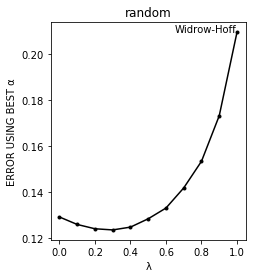

********** balanced **********
Calculating best alphas...
lambda:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best alpha:  [0.3, 0.3, 0.3, 0.3, 0.25, 0.25, 0.25, 0.2, 0.15, 0.1, 0.05]


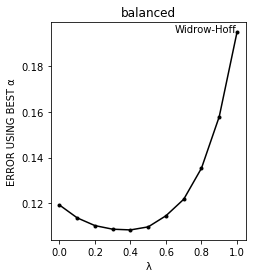

********** bound20 **********
Calculating best alphas...
lambda:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best alpha:  [0.3, 0.3, 0.3, 0.25, 0.25, 0.25, 0.2, 0.2, 0.15, 0.1, 0.05]


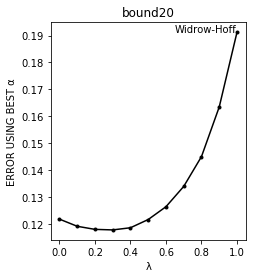

********** balanced_bound20 **********
Calculating best alphas...
lambda:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best alpha:  [0.3, 0.3, 0.3, 0.3, 0.25, 0.25, 0.25, 0.2, 0.15, 0.15, 0.1]


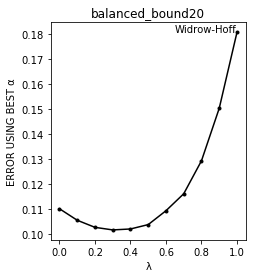

CPU times: user 28.3 s, sys: 469 ms, total: 28.7 s
Wall time: 28.5 s


In [5]:
'''
Block #5: plots related to experiment 2 and Fig 5 in Sutton 1988
This block contains code to generate plots related to Fig 5 in Sutton 1988, press shift + enter to run
For a computer with 2 GHz Intel Core i5 processor and 8 GB 1867 MHz LPDDR3 Memory, this block take ~30 s to run.
'''

def tune_alpha(data, lambdas):
    '''
    tune alpha for each lambda
    '''
    print('Calculating best alphas...')
    alphas = [round(0.05 * i, 2) for i in range(13)] 
    best_alpha = []
    for lmda in lambdas:
        rmse_avg = []
        for alpha in alphas:
            rmse = train_2(alpha, lmda, data, error_per_sequence=True)
            rmse_avg += [np.mean(rmse)]
        best_alpha += [alphas[np.argmin(rmse_avg)]]
#         plt.plot(alphas, rmse_avg)          
#     plt.xlabel("\u03B1")
#     plt.ylabel("ERROR")
#     plt.legend(["\u03BB = " + str(lmda) for lmda in lambdas], loc='upper left')
#     plt.show()
    print('lambda: ', lambdas)
    print('best alpha: ', best_alpha)
    return best_alpha

def generate_plots_3(data, title):
    '''
    generate plot for each dataset
    '''
    lambdas = [round(0.1 * i, 1) for i in range(11)]
    best_alpha = tune_alpha(data, lambdas)
    rmse_avg = []
    rmse_std = []
    for i in range(len(lambdas)):
        rmse = train_2(best_alpha[i], lambdas[i], data, error_per_sequence=True)
        rmse_avg += [np.mean(rmse)]
        rmse_std += [np.std(rmse)/math.sqrt(num_train_sets)]
    plt.figure(figsize=(3.5,4))
    plt.plot(lambdas, rmse_avg,'k.-')
    plt.xlabel("\u03BB")
    plt.ylabel("ERROR USING BEST \u03B1")
    plt.text(0.65, max(rmse_avg), 'Widrow-Hoff')
#     plt.ylim([0.09, 0.21])
    plt.title(title)
    plt.show()
    
            
def experiment_3():
    '''
    generate plots related to Fig 5 in Sutton 1988
    '''
    titles = ['random', 'balanced', 'bound20', 'balanced_bound20']
    generate_data_functions = [generate_data,
                               generate_data_balanced, 
                               generate_data_bound_length,
                               generate_data_bound_length_balanced] 
    for i in range(len(titles)):
        print('********** ' + titles[i] + ' **********') 
        data = generate_data_functions[i]()
        generate_plots_3(data, titles[i])
        
%time experiment_3()